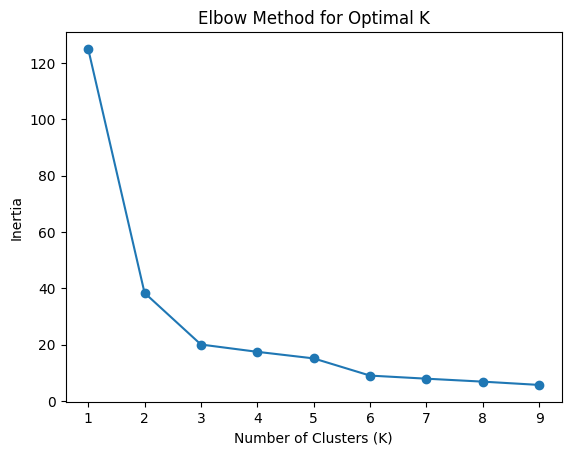

Recommended Communities:
            committee  members  recent_posts  events  rating  tag_match
0          Tech Club      120            15       5     4.7       0.95
3         Music Club      110            18       6     4.6       0.85
9        Gaming Club      100            17       6     4.5       0.85
11  Environment Club      110            16       5     4.6       0.82
16      Finance Club      110            18       6     4.6       0.86
18      Fashion Club      120            20       6     4.7       0.89
22         Yoga Club      100            15       5     4.5       0.83
24         Film Club      110            17       6     4.6       0.88


c:\Users\Gaurav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("committee_recommendation_data.csv")

# Features for clustering
features = ['members', 'recent_posts', 'events', 'rating', 'tag_match']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Train the K-Means model with the optimal K (choose based on the elbow point, e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustered data
# print(df[['committee', 'cluster']])

# Function to recommend communities for a new user
def recommend_for_user(user_features, kmeans_model, scaler, df):
    user_scaled = scaler.transform([user_features])
    cluster = kmeans_model.predict(user_scaled)[0]
    recommendations = df[df['cluster'] == cluster]
    return recommendations[['committee', 'members', 'recent_posts', 'events', 'rating', 'tag_match']]

# Example user input
new_user = [100, 12, 4, 4.5, 0.85]  # Members, Posts, Events, Rating, Tag Match
recommended = recommend_for_user(new_user, kmeans, scaler, df)
print("Recommended Communities:\n", recommended)
